### LOAD LIBRARY

In [1]:
# import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
!ls

archive  Demos_Linear_Regression.ipynb


In [3]:
data = pd.read_csv('archive/advertisement.csv')

In [4]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
data.shape

(4572, 5)

In [6]:
data.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [7]:
data.Influencer.value_counts()

Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: Influencer, dtype: int64

In [8]:
data['Influencer'] = data.Influencer.astype('category').cat.codes

In [9]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181


In [10]:
data.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer         int8
Sales           float64
dtype: object

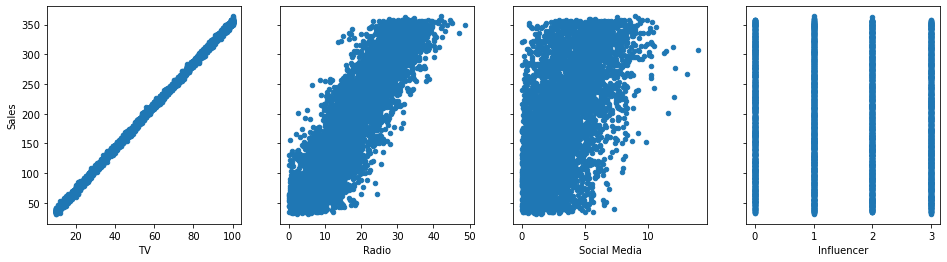

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=ax[0])
data.plot(kind='scatter', x='Radio', y='Sales', ax=ax[1])
data.plot(kind='scatter', x='Social Media', y='Sales', ax=ax[2])
data.plot(kind='scatter', x='Influencer', y='Sales', ax=ax[3], stacked=True)
plt.show()

In [12]:
data.Influencer.unique()

array([1, 2, 3, 0], dtype=int8)

### LOAD MODEL

#### Data preparation

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
data.describe()

,TV,Radio,Social Media,Influencer,Sales
count,4562.000000,4568.000000,4566.000000,4572.000000,4566.000000
mean,54.066857,18.160356,3.323956,1.505031,192.466602
std,26.125054,9.676958,2.212670,1.113243,93.133092
min,10.000000,0.000684,0.000031,0.000000,31.199409
25%,32.000000,10.525957,1.527849,1.000000,112.322882
50%,53.000000,17.859513,3.055565,2.000000,189.231172
75%,77.000000,25.649730,4.807558,2.000000,272.507922
max,100.000000,48.871161,13.981662,3.000000,364.079751


In [15]:
data.dropna(inplace=True)

In [16]:
data.describe()

,TV,Radio,Social Media,Influencer,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,1.506819,192.413332
std,26.104942,9.663260,2.211254,1.112811,93.019873
min,10.000000,0.000684,0.000031,0.000000,31.199409
25%,32.000000,10.555355,1.530822,1.000000,112.434612
50%,53.000000,17.859513,3.055565,2.000000,188.963678
75%,77.000000,25.640603,4.804919,2.000000,272.324236
max,100.000000,48.871161,13.981662,3.000000,364.079751


In [17]:
x = data['TV'].values
x = x.reshape(-1, 1)
y = data['Sales'].values

print(x.shape)
print(y.shape)

(4546, 1)
(4546,)


##### Instance Model

In [18]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [19]:
print(lm.coef_, end=' = coef\n\n')
print(lm.intercept_)

[3.56151409] = coef

-0.13249254000268706


In [20]:
# try predict any Sales for ad TV equal to 33.4
-0.13249254000268706 + 3.56151409 * 33.4

118.82207806599732

In [21]:
new_data = np.array(33.4).reshape(-1, 1)
new_data

array([[33.4]])

In [22]:
# Try prediction
lm.predict(new_data)

array([118.82207822])

In [38]:
new_data = np.array([data.TV.min(), data.TV.max()])
new_data = new_data.reshape(-1, 1)

In [39]:
preds = lm.predict(new_data)

In [40]:
preds

array([ 35.48264841, 356.01891692])

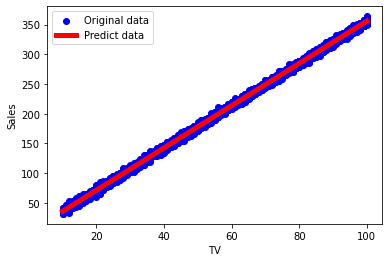

In [47]:
plt.scatter(x=data.TV.values, y=data.Sales.values, c='blue', label='Original data')
plt.plot(new_data, preds, c='red', linewidth=5, label='Predict data')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [49]:
import statsmodels.formula.api as smf

In [58]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

**confidence interval**

In [61]:
lm.conf_int()

,0,1
Intercept,-0.329727,0.064742
TV,3.558229,3.564799


**p-values**

In [62]:
lm.pvalues

Intercept    0.187919
TV           0.000000
dtype: float64

**r squared**

In [66]:
lm.rsquared

0.998994984518024

### Multiple Linear Regression

we will build a model based on multiple variables in training

In [68]:
# Preparing data
features_col = ['TV', 'Radio', 'Social Media']
X = data[features_col]
y = data.Sales

**split data model**

In [69]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Building model

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [72]:
print('intercept: \n',lm.intercept_)
print('\ncoefs(TV, Radio, Social Media): \n', lm.coef_)

intercept: 
 -0.211866376909569

coefs(TV, Radio, Social Media): 
 [ 3.56289374e+00  3.07780255e-03 -2.86452450e-02]


#### Making predictions

In [74]:
predictions = lm.predict(X_test)
predictions

array([ 53.17666145,  70.99619876, 267.03264136, ...,  53.1869741 ,
       124.48496704, 138.71321491])

#### Evaluate the mean squared error

In [77]:
print(sqrt(mean_squared_error(y_test, predictions)))

2.9444332297014153


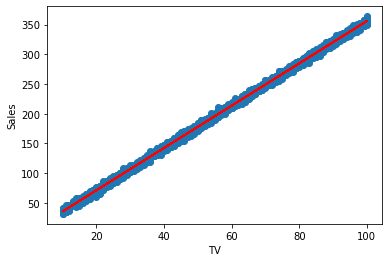

In [84]:
plt.scatter(X_train.TV, y_train)
plt.plot(X_test.TV, predictions, c='red')
plt.xlabel('TV'); plt.ylabel('Sales');
plt.show()

### Multiple Linear Model with statsmodels

In [89]:
data.rename({"Social Media":'Social_Media'}, axis=1, inplace=True)
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181


In [90]:
lm = smf.ols(formula='Sales ~ TV + Radio + Social_Media', data=data).fit()

**Confidence interval**

In [91]:
lm.conf_int()

,0,1
Intercept,-0.335541,0.067615
TV,3.555925,3.569214
Radio,-0.023145,0.015204
Social_Media,-0.043820,0.053748


**Summary about model  with statsmodels**

In [94]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:03:02   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear model include categorical data

In [97]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [98]:
X.head()

,TV,Radio,Social_Media,Influencer
0,16.0,6.566231,2.907983,1
1,13.0,9.237765,2.409567,1
2,41.0,15.886446,2.913410,1
3,83.0,30.020028,6.922304,1
4,15.0,8.437408,1.405998,2


In [99]:
y.head()

0     54.732757
1     46.677897
2    150.177829
3    298.246340
4     56.594181
Name: Sales, dtype: float64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
lm = LinearRegression().fit(X_train, y_train)

In [103]:
lm.score(X_test, y_test)

0.9990152260554946

In [104]:
lm.score(X_train, y_train)

0.9989852470807834

In [105]:
predictions = lm.predict(X_test)

In [106]:
# evaluate accuracy
print(r2_score(y_test, predictions))

0.9990152260554946


In [107]:
X_test.head()

,TV,Radio,Social_Media,Influencer
497,15.0,3.518070,2.293790,2
3800,20.0,7.756876,2.572287,1
24,75.0,20.348988,1.227180,2
1918,55.0,20.108487,2.728374,1
142,77.0,31.653200,7.776978,3


In [108]:
predictions[:5]

array([ 53.16054138,  71.01420659, 267.0160003 , 195.74855399,
       273.95307164])